**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**

_Each image is 28 x 28 pixel in dimension_

In [5]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train[0]

9

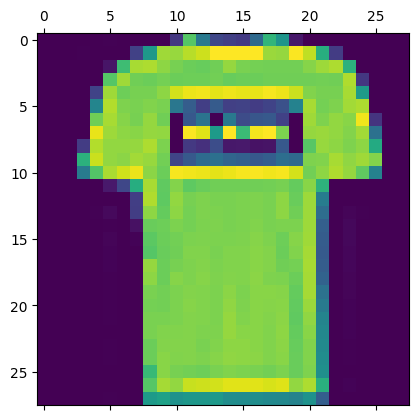

In [11]:
from matplotlib import pyplot as plt
plt.matshow(X_train[1])

In [12]:
y_train[1] # Outut 0-9 labels denotes each clothing item

0

**Normalize training data before modelling**

In [14]:
X_train = X_train/255
X_test = X_test/255
#255 pixel boxes 0-black 1- while

**Now build the Sequential Model and add layers into it**

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

In [17]:
model = Sequential()
model.add(Flatten(input_shape= [28, 28]))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

C:\Users\ANITHA SRI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7817 - loss: 0.6357


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

![Fashion MNIST Sample](fashion_neural_net.png)

In [43]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8501 - loss: 0.4290


[0.43709051609039307, 0.8449000120162964]

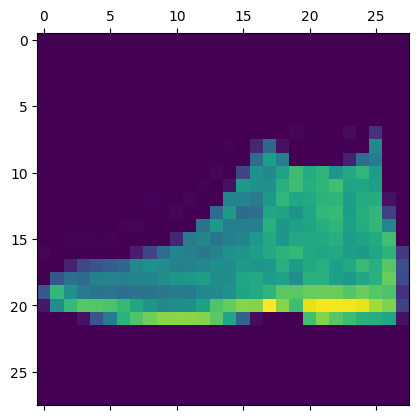

In [45]:
plt.matshow(X_test[0])

In [47]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


In [57]:
y_pred[0]

array([1.1024570e-04, 3.8869334e-06, 3.0032186e-05, 2.4261182e-05,
       2.7925298e-05, 1.3138299e-01, 5.4771841e-05, 2.7777815e-01,
       3.2226227e-03, 5.8736509e-01], dtype=float32)

In [59]:
import numpy as np
np.argmax(y_pred[0])

9

In [69]:
# Hence 9 is Ankle Boot. correctly predicted

In [63]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [67]:
class_labels[np.argmax(y_pred[0])]

'Ankle boot'